<a href="https://colab.research.google.com/github/deboraxhx/JornadaDataScience/blob/master/simple_analise_de_dados_COMICS_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


dados = pd.read_csv('/content/drive/MyDrive/comics_data.csv')

Visualizando os dados

In [49]:
dados.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
title,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man,'Mazing Man
title_link,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man,/series/4036/0/dc-comics-mazing-man
issue_link,https://comicbookrealm.com/series/4036/54341/d...,https://comicbookrealm.com/series/4036/54350/d...,https://comicbookrealm.com/series/4036/54351/d...,https://comicbookrealm.com/series/4036/54352/d...,https://comicbookrealm.com/series/4036/54342/d...
cover_link,/cover-scan/acb40c8a57d50781194e37be2a94b3d5/l...,/cover-scan/293f4e231eccb71ad6e6bc3fe3e49c4f/l...,/cover-scan/45c7a284efa7d07f7bb5c9afb3080ffd/l...,/cover-scan/21764f5da802b25622831976f1619aa4/l...,/cover-scan/3a4df503a1fb2450b1227f4c1f0c45d9/l...
issue,# 1,# 10,# 11,# 12,# 2
cover_date,Jan '86,Oct '86,Nov '86,Dec '86,Feb '86
cover_price,$0.75,$0.75,$0.75,$0.75,$0.75
current_value,$3.00,$3.00,$3.00,$4.00,$3.00
hist_prices_link,/comic.php?a=historical&comic=54341?keepThis=t...,/comic.php?a=historical&comic=54350?keepThis=t...,/comic.php?a=historical&comic=54351?keepThis=t...,/comic.php?a=historical&comic=54352?keepThis=t...,/comic.php?a=historical&comic=54342?keepThis=t...


In [50]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,461301.0,230650.000000,133166.272601,0.0,115325.0,230650.0,345975.0,461300.0
searched,461301.0,472.510892,1832.640726,0.0,46.0,119.0,343.0,224080.0
owned,461301.0,54.493832,157.031092,0.0,1.0,6.0,33.0,6478.0
pages,208011.0,53.804641,195.457862,0.0,32.0,32.0,36.0,75960.0
rating,461301.0,0.378575,1.217336,0.0,0.0,0.0,0.0,5.0
rating_count,461301.0,0.141645,0.582849,0.0,0.0,0.0,0.0,15.0
pub_id,461301.0,1389.146538,1766.452783,1.0,2.0,559.0,2960.0,8253.0
issues_total,456401.0,105.147651,215.981536,1.0,8.0,28.0,99.0,1801.0
pub_titles_total,461301.0,2039.691928,2620.827222,1.0,91.0,517.0,4688.0,7285.0
pub_issues_total,461301.0,20774.509437,25262.635323,0.0,811.0,6574.0,57043.0,65535.0


In [51]:
dados['title_issue'] = dados['title'] + ' ' + dados['issue']

In [52]:
dados.drop(['Unnamed: 0','title_link','issue_link','cover_link','hist_prices_link','issue'],axis=1,inplace=True)

In [53]:
dados['current_value'] = dados['current_value'].str.replace('$', '', regex=True)
dados['current_value'] = dados['current_value'].str.replace(',', '', regex=True)
dados['current_value'] = dados.current_value.astype(float) 

In [54]:
#FOI NECESSÁRIO SUBSTITUIR POR OUTRA LETRAS TODAS AS PALAVRAS DE SIMBOLOS DA COLUNA, E DEPOIS UTILIZAR STRIP PARA RETIRA-LAS.
dados['cover_date'] = dados['cover_date'].str.replace('\D+','a', regex=True)
dados['cover_date'] = dados['cover_date'].str.strip('a')

In [55]:
#FILTRANDOS OS DADOS PARA RETIRAR OS DADOS FALTANTES, E DEPOIS VERIFICAR OS VALORES UNICOS DA COLUNA PARA A REALIZAÇÃO DE AJUSTES.
dados = dados[dados.cover_date.isin(['']) ==False]
dados.cover_date.unique()

array(['86', '2007', '22', '75', '76', nan, '06', '16', '07', '12', '08',
       '64', '65', '02', '00', '47', '49', '50', '51', '52', '53', '48',
       '54', '55', '56', '57', '58', '59', '60', '04', '19', '17', '18',
       '99', '14', '10', '11', '05', '15', '13', '09', '20', '21', '2003',
       '94', '38', '39', '46', '91', '87', '90', '82', '97', '40', '61',
       '62', '63', '41', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '42', '77', '78', '79', '80', '81', '83', '84', '43', '85',
       '88', '89', '92', '44', '93', '95', '96', '98', '01', '03', '45',
       '1937', '1942', '2000', '2002', '2004', '2006', '1944', '1945',
       '1943', '1991', '1977', '1973', '1994', '2018', '2010', '1996',
       '1988', '1997', '2005', '1990', '1993', '1999', '1995', '1998',
       '2001', '1992', '2019', '2008', '2009', '2015', '1981', '1966',
       '2012', '35', '1989', '1978', '2016', '1982', '2017', '1979',
       '1983', '1975', '1971', '2021', '37', '36', '1936', '

In [56]:
#TRANSFORMANDO A COLUNA 'cover_date' EM INTEIRO
dados = dados[dados['cover_date'].notna()]
dados['cover_date'] = dados['cover_date'].astype(int)

In [57]:
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+2000 if 0 <= x < 23  else x)
dados['cover_date'] =  dados['cover_date'].apply(lambda x: x+1900 if 22 < x < 100 else x)
dados['cover_date'] =  dados['cover_date'].apply(lambda x: 2022-x if x >= 0 else x)

Analisando os dados faltantes de todo o conjunto de dados

In [58]:
import missingno as msno

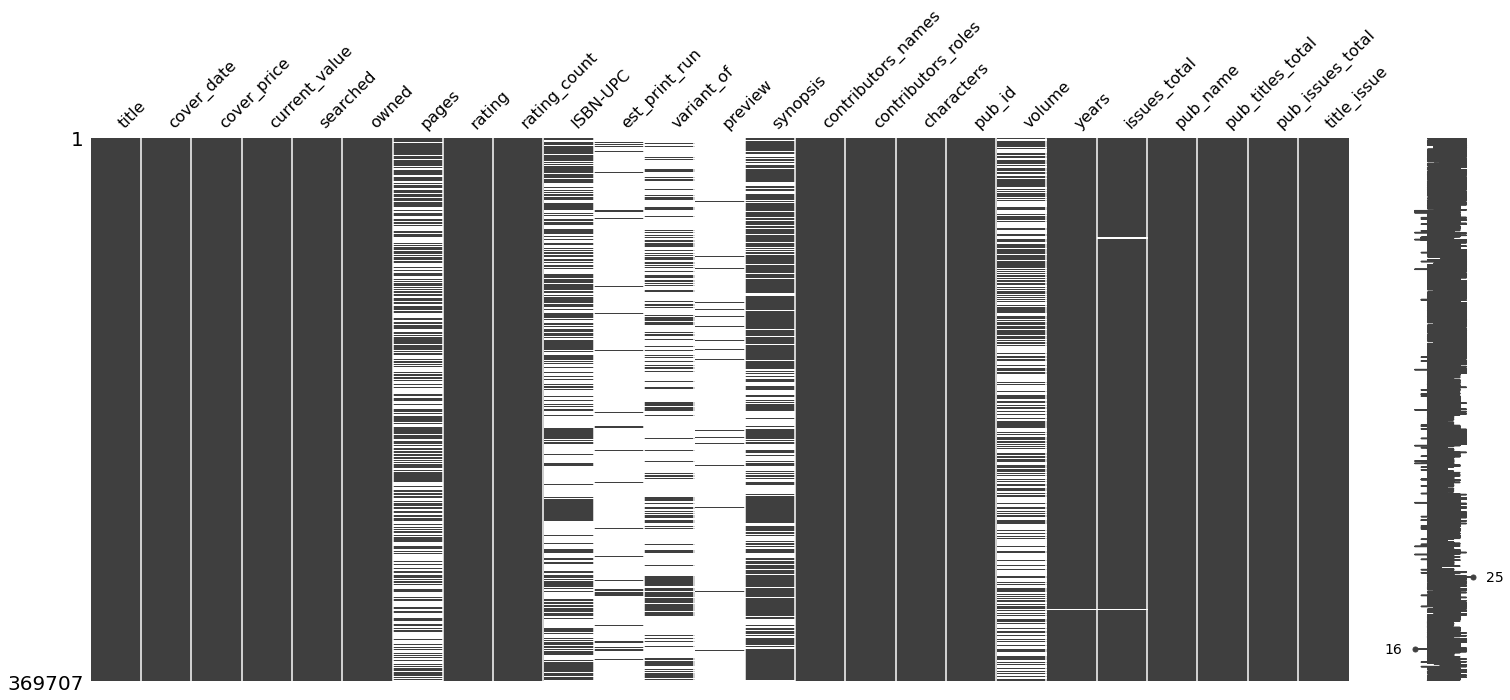

In [59]:
msno.matrix(dados);

Com isso podemos ter uma boa ideia do nosso conjunto de dados. 

1. as colunas de rating possuem valores zerados tanto para as colunas owned, rating, count_rating. E o que torna mais discrepante ainda é que no minimo 75% dos dados nas rating, count_rating são 0.

2. Vamos verificar a distribuição dos valores num histograma

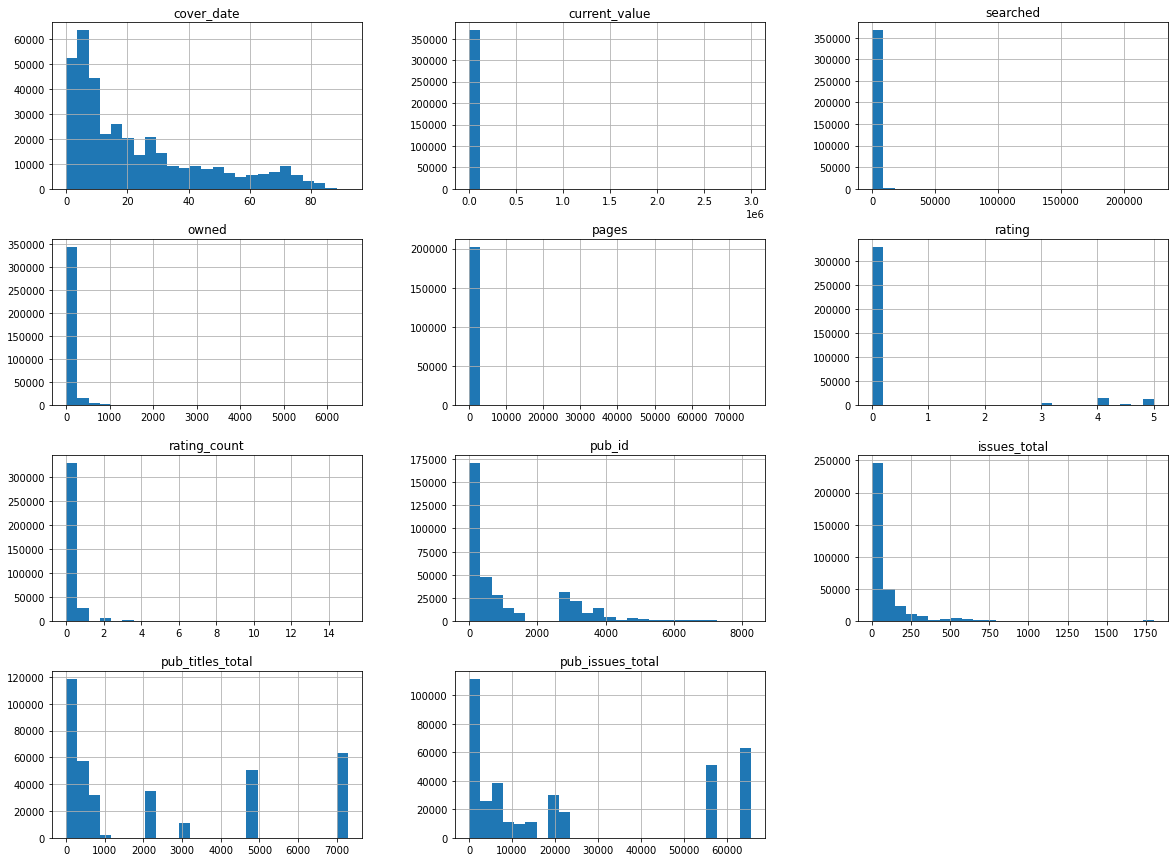

In [60]:
dados.hist(bins=25, figsize=(20,15));

Agora analisaremos dos dados individualmente

## ANALISE DE RATINGS

tamanho da amostra: 369707


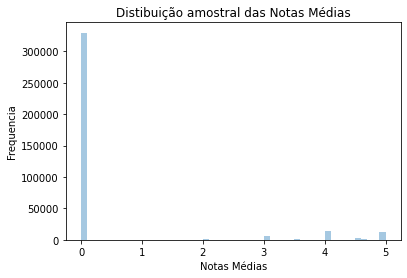

In [61]:
print('tamanho da amostra:', len(dados['rating']))
ax = sns.distplot(x=dados['rating'], kde = False)
ax.set(title = 'Distibuição amostral das Notas Médias', xlabel = 'Notas Médias', ylabel='Frequencia');

Percebemos uma quantidade muita grande de notas médias 0 que as outras notas. 

tamanho da amostra: 40114


[Text(0, 0.5, 'Frequencia'),
 Text(0.5, 0, 'Notas Médias'),
 Text(0.5, 1.0, 'Distribuição da amostra das notas médias maiores que zero')]

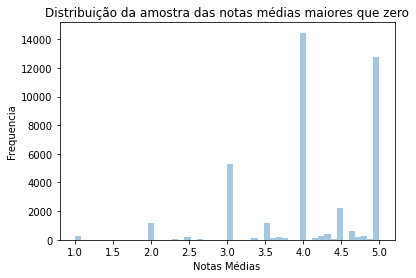

In [62]:
ratings_maior_zero = dados.query('rating > 0')
print('tamanho da amostra:',len(ratings_maior_zero.rating))
ax = sns.distplot(ratings_maior_zero.rating, kde = False)
ax.set(title='Distribuição da amostra das notas médias maiores que zero', ylabel = 'Frequencia', xlabel = 'Notas Médias')

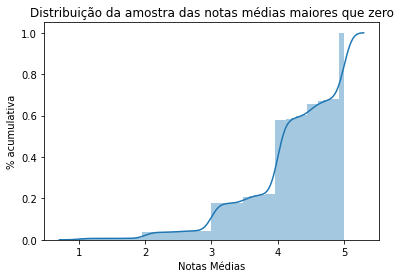

In [63]:
ax = sns.distplot(ratings_maior_zero.rating, hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title='Distribuição da amostra das notas médias maiores que zero', ylabel = '% acumulativa', xlabel = 'Notas Médias');

Podemos ter somente um voto para cada comics, vamos verificar quantos desses votos teve somente um votante. 

In [64]:
count_igual_1 = ratings_maior_zero.query('rating_count == 1')
count_maior_5 = ratings_maior_zero.query('rating_count >= 5')
print('receberam somente 1 review:', len(count_igual_1['rating_count']))
print('receberam mais que 4 reviews:', len(count_maior_5['rating_count']))
print('quantidade total dos que receperam pelo menos 1 review:', len(ratings_maior_zero))
print('------------------------------------------------------------------------------------------------------------')
print('quantidade de titulos que recebream mais que 1 review', 42284-29889)
print('quantidade que recebeu menos que 5 reviews:', 42284-1393)

receberam somente 1 review: 28168
receberam mais que 4 reviews: 1361
quantidade total dos que receperam pelo menos 1 review: 40114
------------------------------------------------------------------------------------------------------------
quantidade de titulos que recebream mais que 1 review 12395
quantidade que recebeu menos que 5 reviews: 40891


Após analise percebemos que perdemos significadamente o tamanho de nossa amostra, mas para a analise ser pelo menos um pouco representativa, limitaremos nossa analise a aqueles que receberam mais que 4 reviews.

# COMICS COM PELO MENOS 5 AVALIAÇÕES

tamanho da amostra: 1361


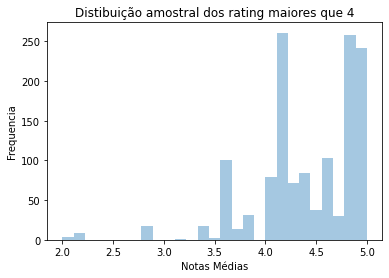

In [65]:
print('tamanho da amostra:', len(count_maior_5['rating']))
ax = sns.distplot(x=count_maior_5['rating'], kde = False)
ax.set(title = 'Distibuição amostral dos rating maiores que 4', xlabel = 'Notas Médias', ylabel='Frequencia');

tamanho da amostra: 1361


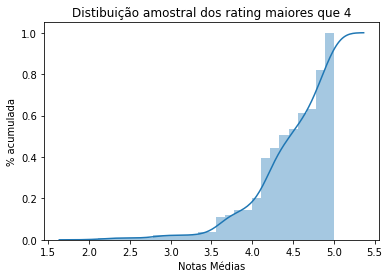

In [66]:
print('tamanho da amostra:', len(count_maior_5['rating']))
ax = sns.distplot(x=count_maior_5['rating'], hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title = 'Distibuição amostral dos rating maiores que 4', xlabel = 'Notas Médias', ylabel='% acumulada');

Text(0.5, 1.0, 'Distibuição amostral dos avaliações maiores que 4')

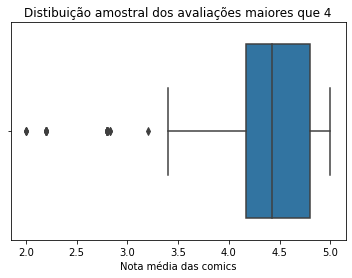

In [67]:
ax = sns.boxplot(x=count_maior_5['rating'])
ax.set(xlabel="Nota média das comics")
ax.set_title('Distibuição amostral dos avaliações maiores que 4')

In [68]:
print('Média de avaliação dos comics com mais de 4 avaliações', count_maior_5.rating.mean())

Média de avaliação dos comics com mais de 4 avaliações 4.396193975018361


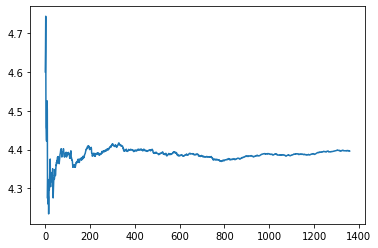

In [69]:
np.random.seed(42)
temp_5 = count_maior_5.sample(frac=1)

medias_5 = [temp_5.rating[0:i].mean() for i in range(1, len(temp_5.rating))]

plt.plot(medias_5)

In [70]:
rating5 = count_maior_5.rating
from statsmodels.stats.weightstats import zconfint
zconfint(rating5)

(4.36878850869257, 4.423599441344169)

Podemos também concluir que as notas médias dos comics são generosos, com as notas acima de 4 sendo bastante frequentes. 

Agora vamos analisar os titulos que contem acima de 10 avaliações. 

# ANALISE DE SEARCHED

tamanho da amostra: 369707


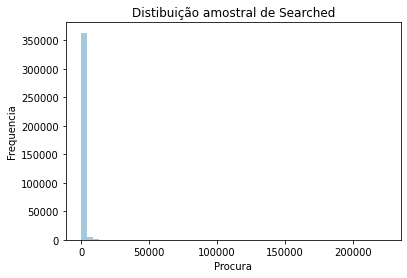

In [71]:
print('tamanho da amostra:', len(dados.searched))
ax = sns.distplot(x=dados.searched, kde=False);
ax.set(title = 'Distibuição amostral de Searched', xlabel = 'Procura', ylabel='Frequencia');

Text(0.5, 1.0, 'Distibuição amostral da procura por titulos')

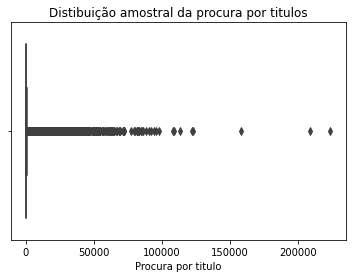

In [72]:
ax = sns.boxplot(x=dados.searched)
ax.set(xlabel="Procura por titulo")
ax.set_title('Distibuição amostral da procura por titulos')

A distribuição das vezes que um Comics foi pesquisado, parece possuir muitos valores proximos de zero, vamos verificar:

In [73]:
print('igual à 0:  ', dados.query("searched == 0").searched.count())
print('maior que 1:', dados.query("searched > 1").searched.count())
print('maior que 50:', dados.query("searched > 50").searched.count())
print('maior que 500:', dados.query("searched > 500").searched.count())
print('maior que 5000:', dados.query("searched > 5000").searched.count())
print('maior que 50000:', dados.query("searched > 50000").searched.count())
print('maior que 100000:', dados.query("searched > 100000").searched.count())

igual à 0:   52
maior que 1: 369509
maior que 50: 288316
maior que 500: 79894
maior que 5000: 5686
maior que 50000: 87
maior que 100000: 8


In [74]:
dados.searched.describe()

count    369707.000000
mean        557.364421
std        2030.449350
min           0.000000
25%          57.000000
50%         150.000000
75%         420.000000
max      224080.000000
Name: searched, dtype: float64

In [75]:
dados.searched.quantile(0.9)

1122.0

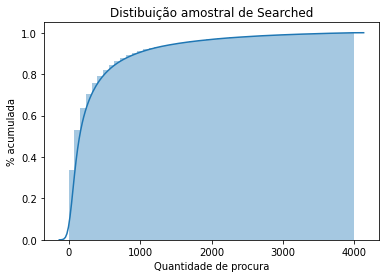

In [76]:
ax = sns.distplot(x=dados.query('searched < 4000').searched, hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title = 'Distibuição amostral de Searched', xlabel = 'Quantidade de procura', ylabel='% acumulada');

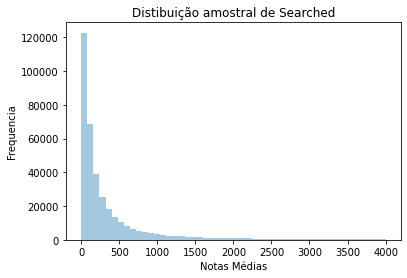

In [77]:
ax = sns.distplot(x=dados.query('searched < 4000').searched, kde=False);
ax.set(title = 'Distibuição amostral de Searched', xlabel = 'Notas Médias', ylabel='Frequencia');

Vamos dar uma olhada nos top procurados de nosso conjunto de dados:

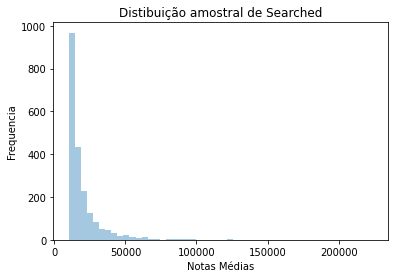

In [78]:
ax = sns.distplot(x=dados.query('searched >= 10000').searched, kde=False);
ax.set(title = 'Distibuição amostral de Searched', xlabel = 'Notas Médias', ylabel='Frequencia');

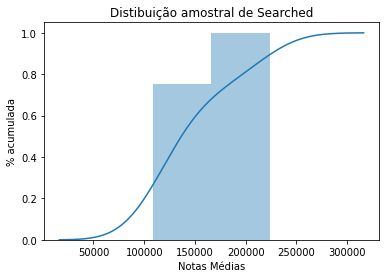

In [79]:
ax = sns.distplot(x=dados.query('searched > 100000').searched, hist_kws = {'cumulative':True},
                          kde_kws = {'cumulative':True});
ax.set(title = 'Distibuição amostral de Searched', xlabel = 'Notas Médias', ylabel='% acumulada');

COMICS COM MAIOR PROCURA

COMPARATIVO

In [81]:
comparativo = dados[['title','searched','owned','current_value','pub_name']]
#comparativo['searched_x_owned'] = comparativo[]
comparativo.sort_values(by='owned', ascending=False)[:10]

,title,searched,owned,current_value,pub_name
179375,Spawn,109188,6478,30.0,Image Comics
156303,Uncanny X-Men,45325,5564,5.0,Marvel Comics
161901,X-Force,51642,5478,8.0,Marvel Comics
162267,X-Men,86519,5393,6.0,Marvel Comics
162554,X-Men,62889,5358,10.0,Marvel Comics
2697,Adventures of Superman,57030,4903,5.0,DC Comics
162649,X-Men,28842,4789,5.0,Marvel Comics
146581,Spider-Man 2099,25994,4681,45.0,Marvel Comics
162564,X-Men,52327,4627,6.0,Marvel Comics
161758,X-Force,68644,4626,6.0,Marvel Comics


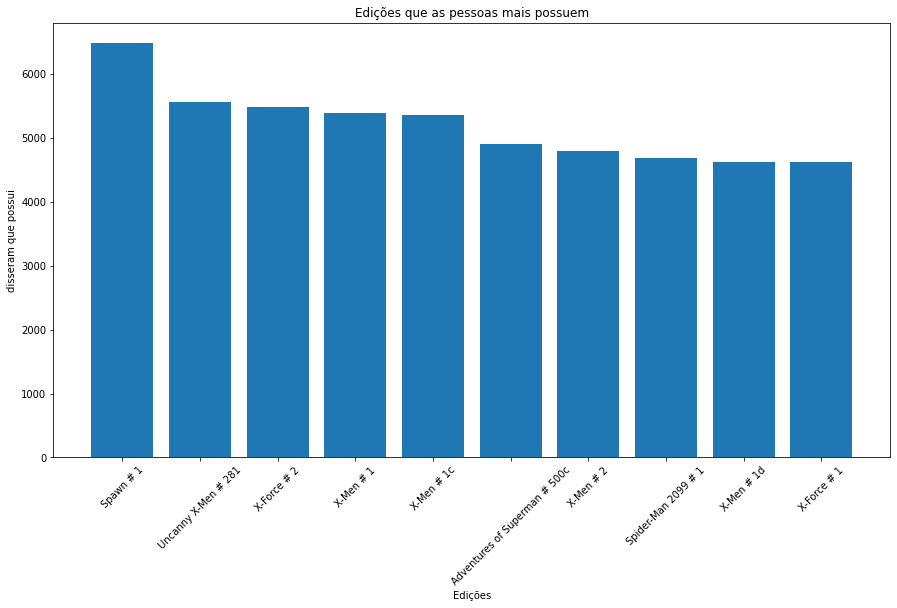

In [124]:
top_10_owned = dados[['title_issue','owned']]

plotar_top_10_owned = top_10_owned.sort_values(by= 'owned', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10_owned['title_issue'], height=plotar_top_10_owned.owned)
plt.xticks(rotation = 45)
plt.ylabel('Disseram que possui');
plt.xlabel('Edições');
plt.title('Edições que as pessoas mais possuem');

In [82]:
comparativo.sort_values(by='searched', ascending=False)[:10]

,title,searched,owned,current_value,pub_name
162427,X-Men,224080,1507,125.0,Marvel Comics
155977,Uncanny X-Men,209227,1719,50.0,Marvel Comics
101639,Amazing Spider-Man,158604,3174,225.0,Marvel Comics
156278,Uncanny X-Men,122915,2493,200.0,Marvel Comics
101528,Amazing Spider-Man,122602,2403,800.0,Marvel Comics
100709,Amazing Spider-Man,113520,175,62000.0,Marvel Comics
179375,Spawn,109188,6478,30.0,Image Comics
156217,Uncanny X-Men,108420,2583,75.0,Marvel Comics
156250,Uncanny X-Men,97897,2562,55.0,Marvel Comics
101348,Amazing Spider-Man,95788,2078,250.0,Marvel Comics


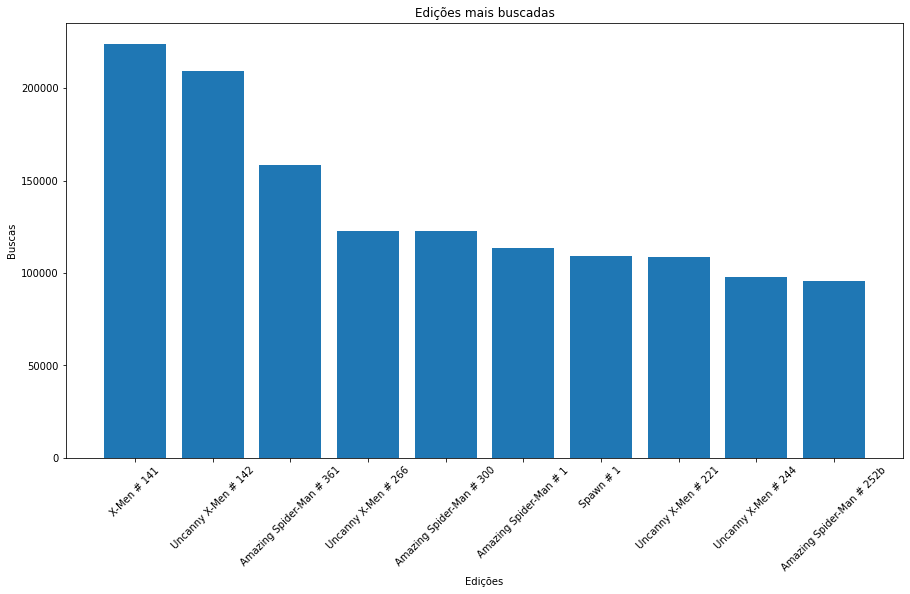

In [122]:
top_10 = dados[['title_issue','searched']]

plotar_top_10 = top_10.sort_values(by= 'searched', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10['title_issue'], height=plotar_top_10.searched)
plt.xticks(rotation = 45)
plt.ylabel('Buscas');
plt.xlabel('Edições');
plt.title('Edições mais buscadas');

Comics mais valiosos segundo nossos dados

In [83]:
comparativo.sort_values(by='current_value', ascending=False)[:10]

,title,searched,owned,current_value,pub_name
266,Action Comics,63691,19,3000000.0,DC Comics
43250,Superman,24682,10,1100000.0,DC Comics
17586,Detective Comics,37656,11,1000000.0,DC Comics
3105,All-American Comics,4485,6,700000.0,DC Comics
5432,Batman,61085,20,550000.0,DC Comics
377100,Captain America Comics,5327,6,365000.0,Timely Comics
1273,Action Comics,13280,8,340000.0,DC Comics
100565,Amazing Fantasy,21278,74,340000.0,Marvel Comics
377402,Marvel Comics,5065,3,320000.0,Timely Comics
377403,Marvel Comics,2137,0,300000.0,Timely Comics


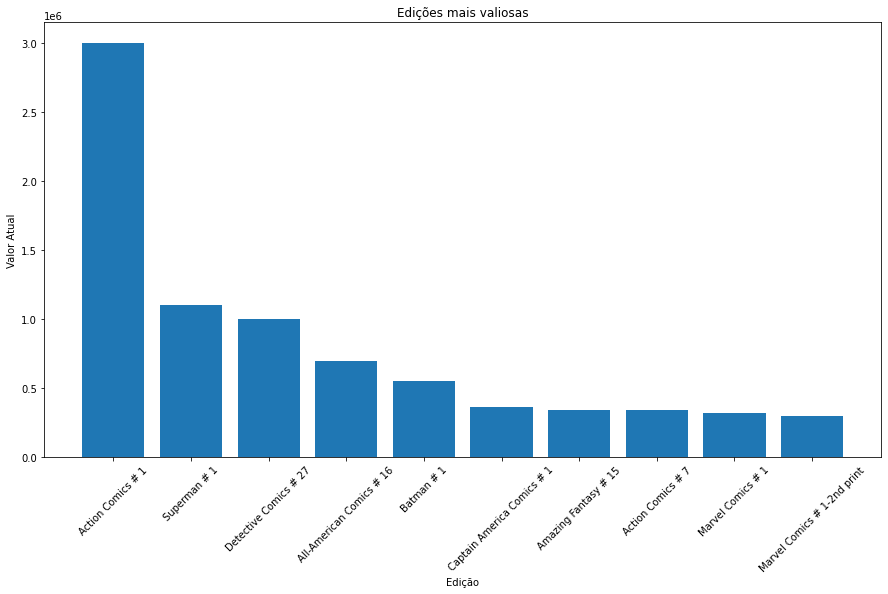

In [123]:
top_10_current_value = dados[['title_issue','current_value']]

plotar_top_10_current_value = top_10_current_value.sort_values(by= 'current_value', ascending=False).iloc[:10,]

plt.figure(figsize= [15,8])
plt.bar(x = plotar_top_10_current_value['title_issue'], height=plotar_top_10_current_value.current_value)
plt.xticks(rotation = 45)
plt.ylabel('Valor Atual');
plt.xlabel('Edição');
plt.title('Edições mais valiosas');

In [86]:
dados[['title', 'searched','owned', 'rating','rating_count','cover_date', 'current_value','pub_name']].sort_values(by='current_value', ascending = False).iloc[:10]

,title,searched,owned,rating,rating_count,cover_date,current_value,pub_name
266,Action Comics,63691,19,4.5,2,84,3000000.0,DC Comics
43250,Superman,24682,10,0.0,0,83,1100000.0,DC Comics
17586,Detective Comics,37656,11,5.0,2,83,1000000.0,DC Comics
3105,All-American Comics,4485,6,0.0,0,82,700000.0,DC Comics
5432,Batman,61085,20,4.0,1,82,550000.0,DC Comics
377100,Captain America Comics,5327,6,0.0,0,81,365000.0,Timely Comics
1273,Action Comics,13280,8,0.0,0,84,340000.0,DC Comics
100565,Amazing Fantasy,21278,74,5.0,4,60,340000.0,Marvel Comics
377402,Marvel Comics,5065,3,0.0,0,83,320000.0,Timely Comics
377403,Marvel Comics,2137,0,0.0,0,83,300000.0,Timely Comics


In [90]:
dados_finalizar = dados[['cover_date', 'current_value', 'searched', 'owned', 'issues_total','pub_issues_total']]

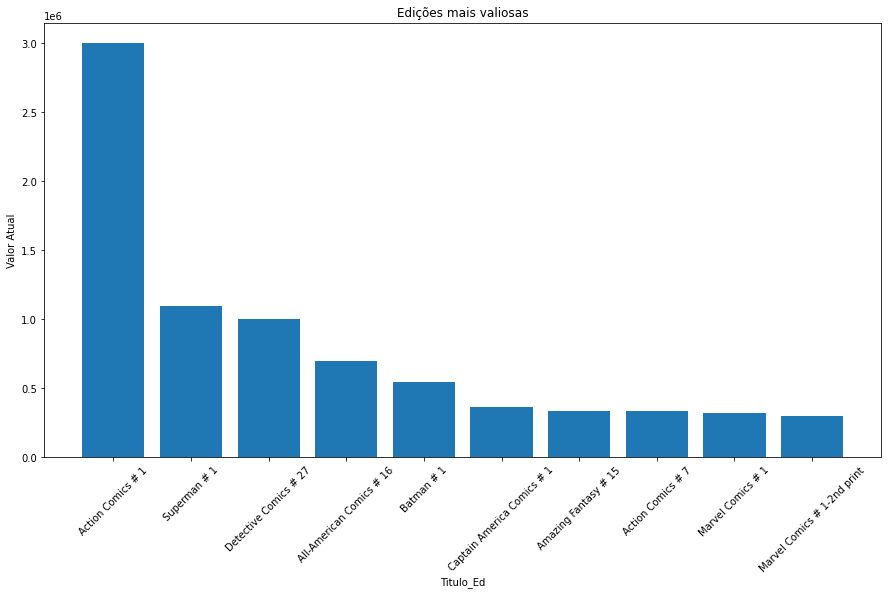

In [120]:
#top_10_current_value = dados[['title_issue','current_value']]

#plotar_top_10_current_value = top_10_current_value.sort_values(by= 'current_value', ascending=False).iloc[:10,]

#plt.figure(figsize= [15,8])
#plt.bar(x = plotar_top_10_current_value['title_issue'], height=plotar_top_10_current_value.current_value)
#plt.xticks(rotation = 45)
#plt.ylabel('Valor Atual');
#plt.xlabel('Titulo_Ed');
#plt.title('Edições mais valiosas');

In [108]:
agrupado_title = dados.groupby('title')['searched', 'owned'].sum()

In [115]:
agrupado_title.reset_index(inplace=True)
agrupado_title_searched = agrupado_title.sort_values(by='searched', ascending=False).iloc[:10]

In [116]:
agrupado_title_searched

,index,title,searched,owned
1840,1840,Amazing Spider-Man,14182111,805549
4288,4288,Batman,7125555,540190
43703,43703,Uncanny X-Men,5770046,676028
46690,46690,X-Men,4347076,343221
3524,3524,Avengers,3316312,347826
14823,14823,Fantastic Four,2925224,318600
12119,12119,Detective Comics,2818292,315485
41499,41499,The Walking Dead,2671420,119497
10947,10947,Daredevil,2487786,292690
36299,36299,Spawn,2470223,199939


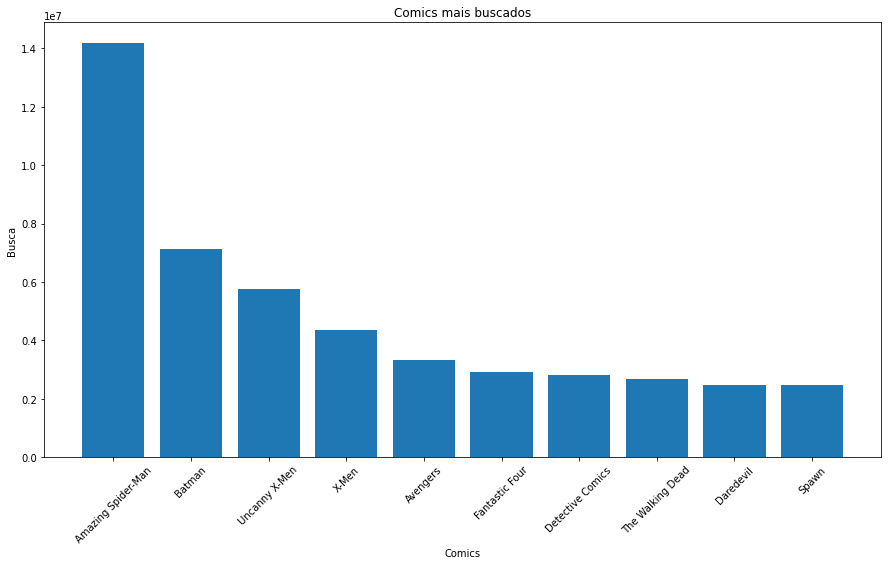

In [125]:
plt.figure(figsize= [15,8])
plt.bar(x = agrupado_title_searched['title'], height=agrupado_title_searched.searched)
plt.xticks(rotation = 45)
plt.ylabel('Busca');
plt.xlabel('Comics');
plt.title('Comics mais buscados');

In [118]:
agrupado_pub_name = dados.groupby('pub_name')['searched', 'owned'].sum()
agrupado_pub_name.reset_index(inplace=True)
agrupado_pub_name_searched = agrupado_pub_name.sort_values(by='searched', ascending=False).iloc[:10]

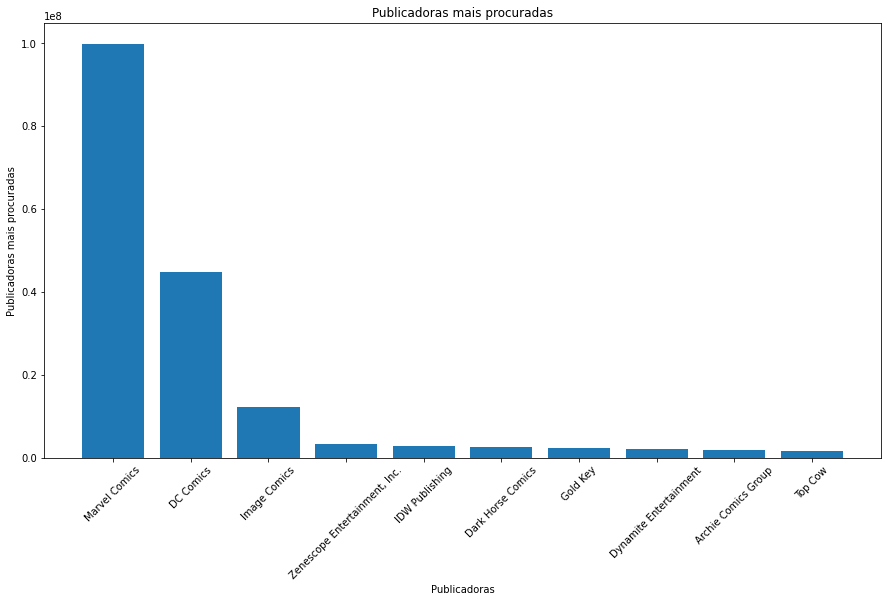

In [119]:
plt.figure(figsize= [15,8])
plt.bar(x = agrupado_pub_name_searched['pub_name'], height=agrupado_pub_name_searched.searched)
plt.xticks(rotation = 45)
plt.ylabel('Publicadoras mais procuradas');
plt.xlabel('Publicadoras');
plt.title('Publicadoras mais procuradas');

In [88]:
dados = dados[dados['issues_total'].notna()]

In [91]:
pd.isna(dados_finalizar).sum()

cover_date          0
current_value       0
searched            0
owned               0
issues_total        0
pub_issues_total    0
dtype: int64

In [92]:
corr_matrix = dados_finalizar.corr()
corr_matrix['current_value'].sort_values(ascending=False)

current_value       1.000000
searched            0.084156
cover_date          0.044879
issues_total        0.024052
pub_issues_total    0.005725
owned              -0.006059
Name: current_value, dtype: float64